In [2]:
import sys
sys.path.append("../")
sys.path.append("../../")
from svm import Snacks
import utils
import matplotlib.pyplot as plt
import seaborn as sns
from constants import BEST_VALUES
%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12,8)

In [3]:
def run(dset):
    m, g, lmbd = BEST_VALUES[dset][0], BEST_VALUES[dset][1], BEST_VALUES[dset][-2]
    X, y, oXtr, oXts, oYtr, oYts = utils.dataloader(dset)
    Xtr, Ytr, Xts, Yts = utils.kernel_embedding(oXtr, oYtr, oXts, oYts, num_centers = m, gamma = g)
    
    snacks = Snacks(lmbd, n_iter = 1e4, K = 50, verbose = True)
    snacks.fit(Xtr, Ytr)
    its_snacks = [x[0] for x in snacks.objs]
    objs_snacks = [x[1] for x in snacks.objs]

    err_snacks = snacks.score(Xts, Yts)

    model = Snacks(lmbd, n_iter = 1e5, verbose = True)
    model.fit(Xtr, Ytr)

    its_model = [x[0] for x in model.objs]
    objs_model = [x[1] for x in model.objs]

    err_model = model.score(Xts, Yts)

    model2 = Snacks(lmbd, n_iter = 2e4, K = 25, verbose = True)
    model2.fit(Xtr, Ytr)

    its_model2 = [x[0] for x in model2.objs]
    objs_model2 = [x[1] for x in model2.objs]

    err_model2 = model2.score(Xts, Yts)

    model1 = Snacks(lmbd, n_iter = 5e3, K = 100, verbose = True)
    model1.fit(Xtr, Ytr)

    its_model1 = [x[0] for x in model1.objs]
    objs_model1 = [x[1] for x in model1.objs]

    err_model1 = model1.score(Xts, Yts)

    return its_snacks, objs_snacks, its_model, objs_model, its_model1, objs_model1, its_model2, objs_model2, err_snacks, err_model, err_model1, err_model2

Dataset: a9a


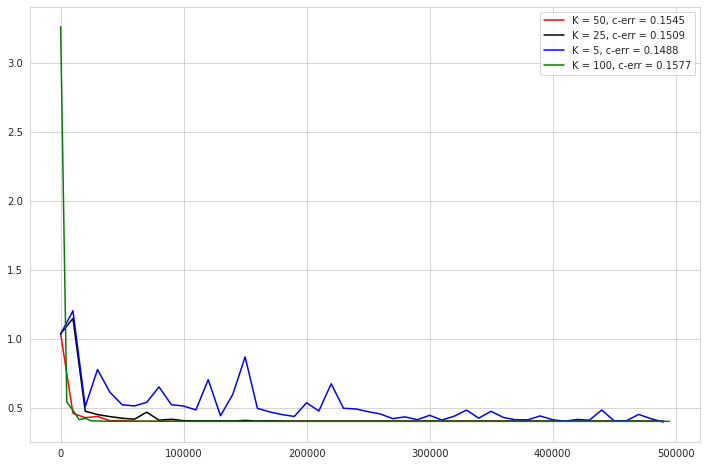

In [4]:
its_snacks, objs_snacks, its_model, objs_model, its_model1, objs_model1, its_model2, objs_model2, err_snacks, err_model, err_model1, err_model2 = run('a9a')
plt.plot(its_snacks, objs_snacks, color = "red", label = f"K = 50, c-err = {1 - err_snacks:.4f}")
plt.plot(its_model2, objs_model2, color = "black", label = f"K = 25, c-err = {1 - err_model2:.4f}")
plt.plot(its_model, objs_model, color = "blue", label = f"K = 5, c-err = {1 - err_model:.4f}")
plt.plot(its_model1, objs_model1, color = "green", label = f"K = 100, c-err = {1 - err_model1:.4f}")
plt.legend(loc="upper right")
plt.savefig('test')

Dataset: ijcnn1


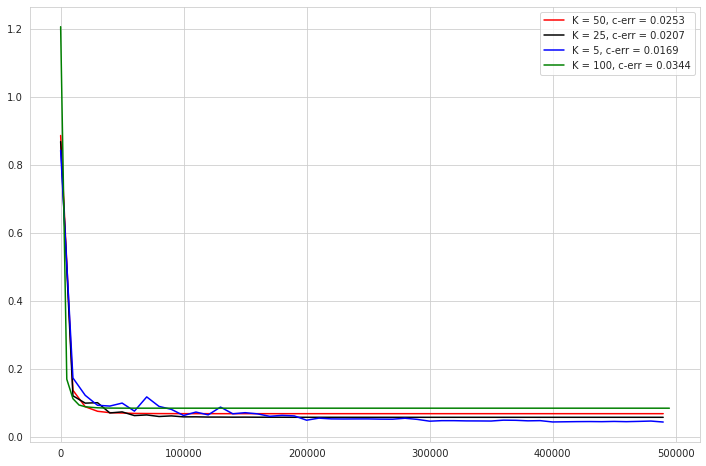

In [4]:
its_snacks, objs_snacks, its_model, objs_model, its_model1, objs_model1, its_model2, objs_model2, err_snacks, err_model, err_model1, err_model2 = run('ijcnn1')
plt.plot(its_snacks, objs_snacks, color = "red", label = f"K = 50, c-err = {1 - err_snacks:.4f}")
plt.plot(its_model2, objs_model2, color = "black", label = f"K = 25, c-err = {1 - err_model2:.4f}")
plt.plot(its_model, objs_model, color = "blue", label = f"K = 5, c-err = {1 - err_model:.4f}")
plt.plot(its_model1, objs_model1, color = "green", label = f"K = 100, c-err = {1 - err_model1:.4f}")
plt.legend(loc="upper right")

Dataset: SUSY


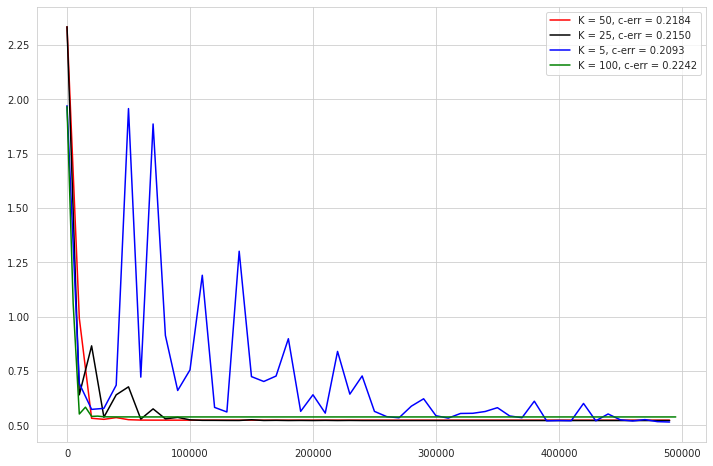

In [5]:
its_snacks, objs_snacks, its_model, objs_model, its_model1, objs_model1, its_model2, objs_model2, err_snacks, err_model, err_model1, err_model2 = run('SUSY')
plt.plot(its_snacks, objs_snacks, color = "red", label = f"K = 50, c-err = {1 - err_snacks:.4f}")
plt.plot(its_model2, objs_model2, color = "black", label = f"K = 25, c-err = {1 - err_model2:.4f}")
plt.plot(its_model, objs_model, color = "blue", label = f"K = 5, c-err = {1 - err_model:.4f}")
plt.plot(its_model1, objs_model1, color = "green", label = f"K = 100, c-err = {1 - err_model1:.4f}")
plt.legend(loc="upper right")